# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [12]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 0.5* np.pi
theta = 0.50 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.25 * np.pi
phiE = 0.0 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 11

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

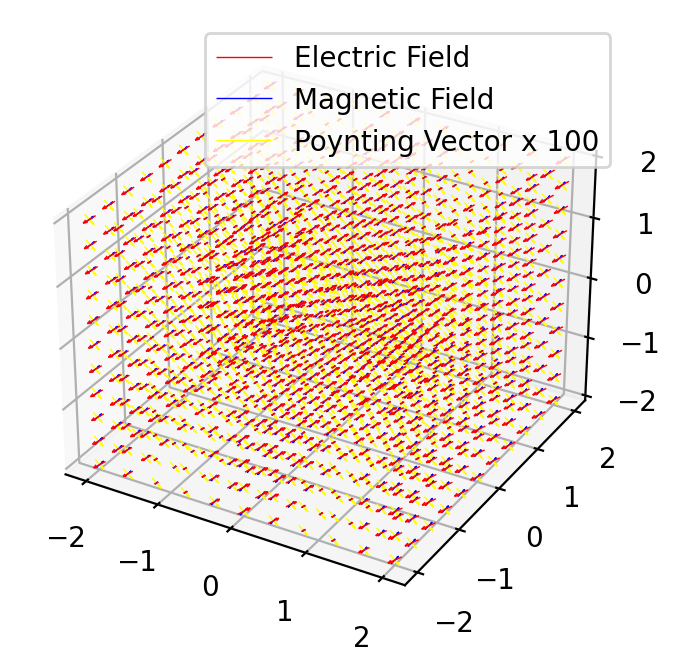

In [13]:
# Plot the field.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='yellow', label='Poynting Vector x 100')
ax.legend()

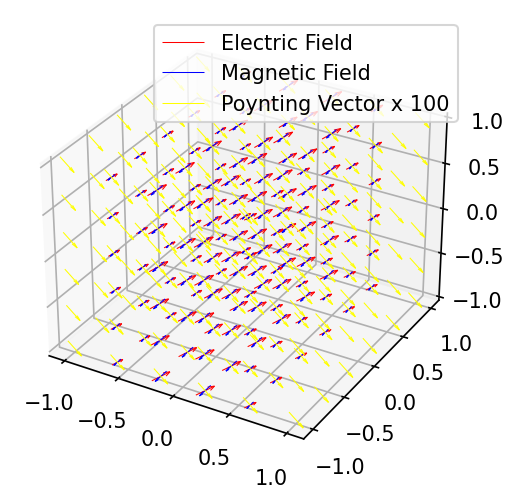

In [4]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='yellow', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

- In what direction does the electric field point?
- In what direction does the magnetic field point?
- In what direction does the Poynting vector point?
- How does this change as you move along the x, y, and z axes?

***The electric field, magnetic field, and Poynting vector are all perpendicular to each other. I tried adjusting the code to make the plots interactive so I could twist the grid to view each axis independently but wasn't able to make it work. I'm also colorblind so I changed the Poynting vector from green to yellow. From my best approximation, the electric and magnetic fields remain perpendicular to each other along the x- and y-axes, while the magnitude and direction of the Poynting vector remains constant along the z-axis.***

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

***The spacial structure appears unchanged compared to the first round of plots, with the caveat that I'm having difficulty seeing all the field lines and moving the plot around. However, given that k sets the magnitude of the wave I would expect an increase in magnitude to result in an increase in the magnitude of the electric and magnetic fields as well. ***

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

***As with the previous response, it's difficult for me to discern the difference in fields from the plot but I expect a decrease in k to decrease the magnitude of the electric and magnetic fields as well.***

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

***The Poynting vector remains perpendicular to the electric and magnetic fields no matter what. By changing the polar and/or azimuthal angles, we change the direction of the wave and thus the planes along which the electric and magnetic fields manifest. In doing so, the direction of the Poynting vector also changes to remain perpendicular to E and B.***

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
- What directions of the electric field give the smallest Poynting vectors?

***When theta is greater than phi by a factor of +pi/2, the magnetic field and Poynting vector go to zero. As the difference in angles approaches +pi/2, the Poynting vector shrinks. For example, setting theta to 0.48/pi and phi to zero will result in a plot with tiny magnetic field lines and small Poynting vectors as compared to a plot where theta and phi were both equal to each other.***

## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

In [38]:
## Use this command to turn ON interactive plots:
%matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

<IPython.core.display.Javascript object>


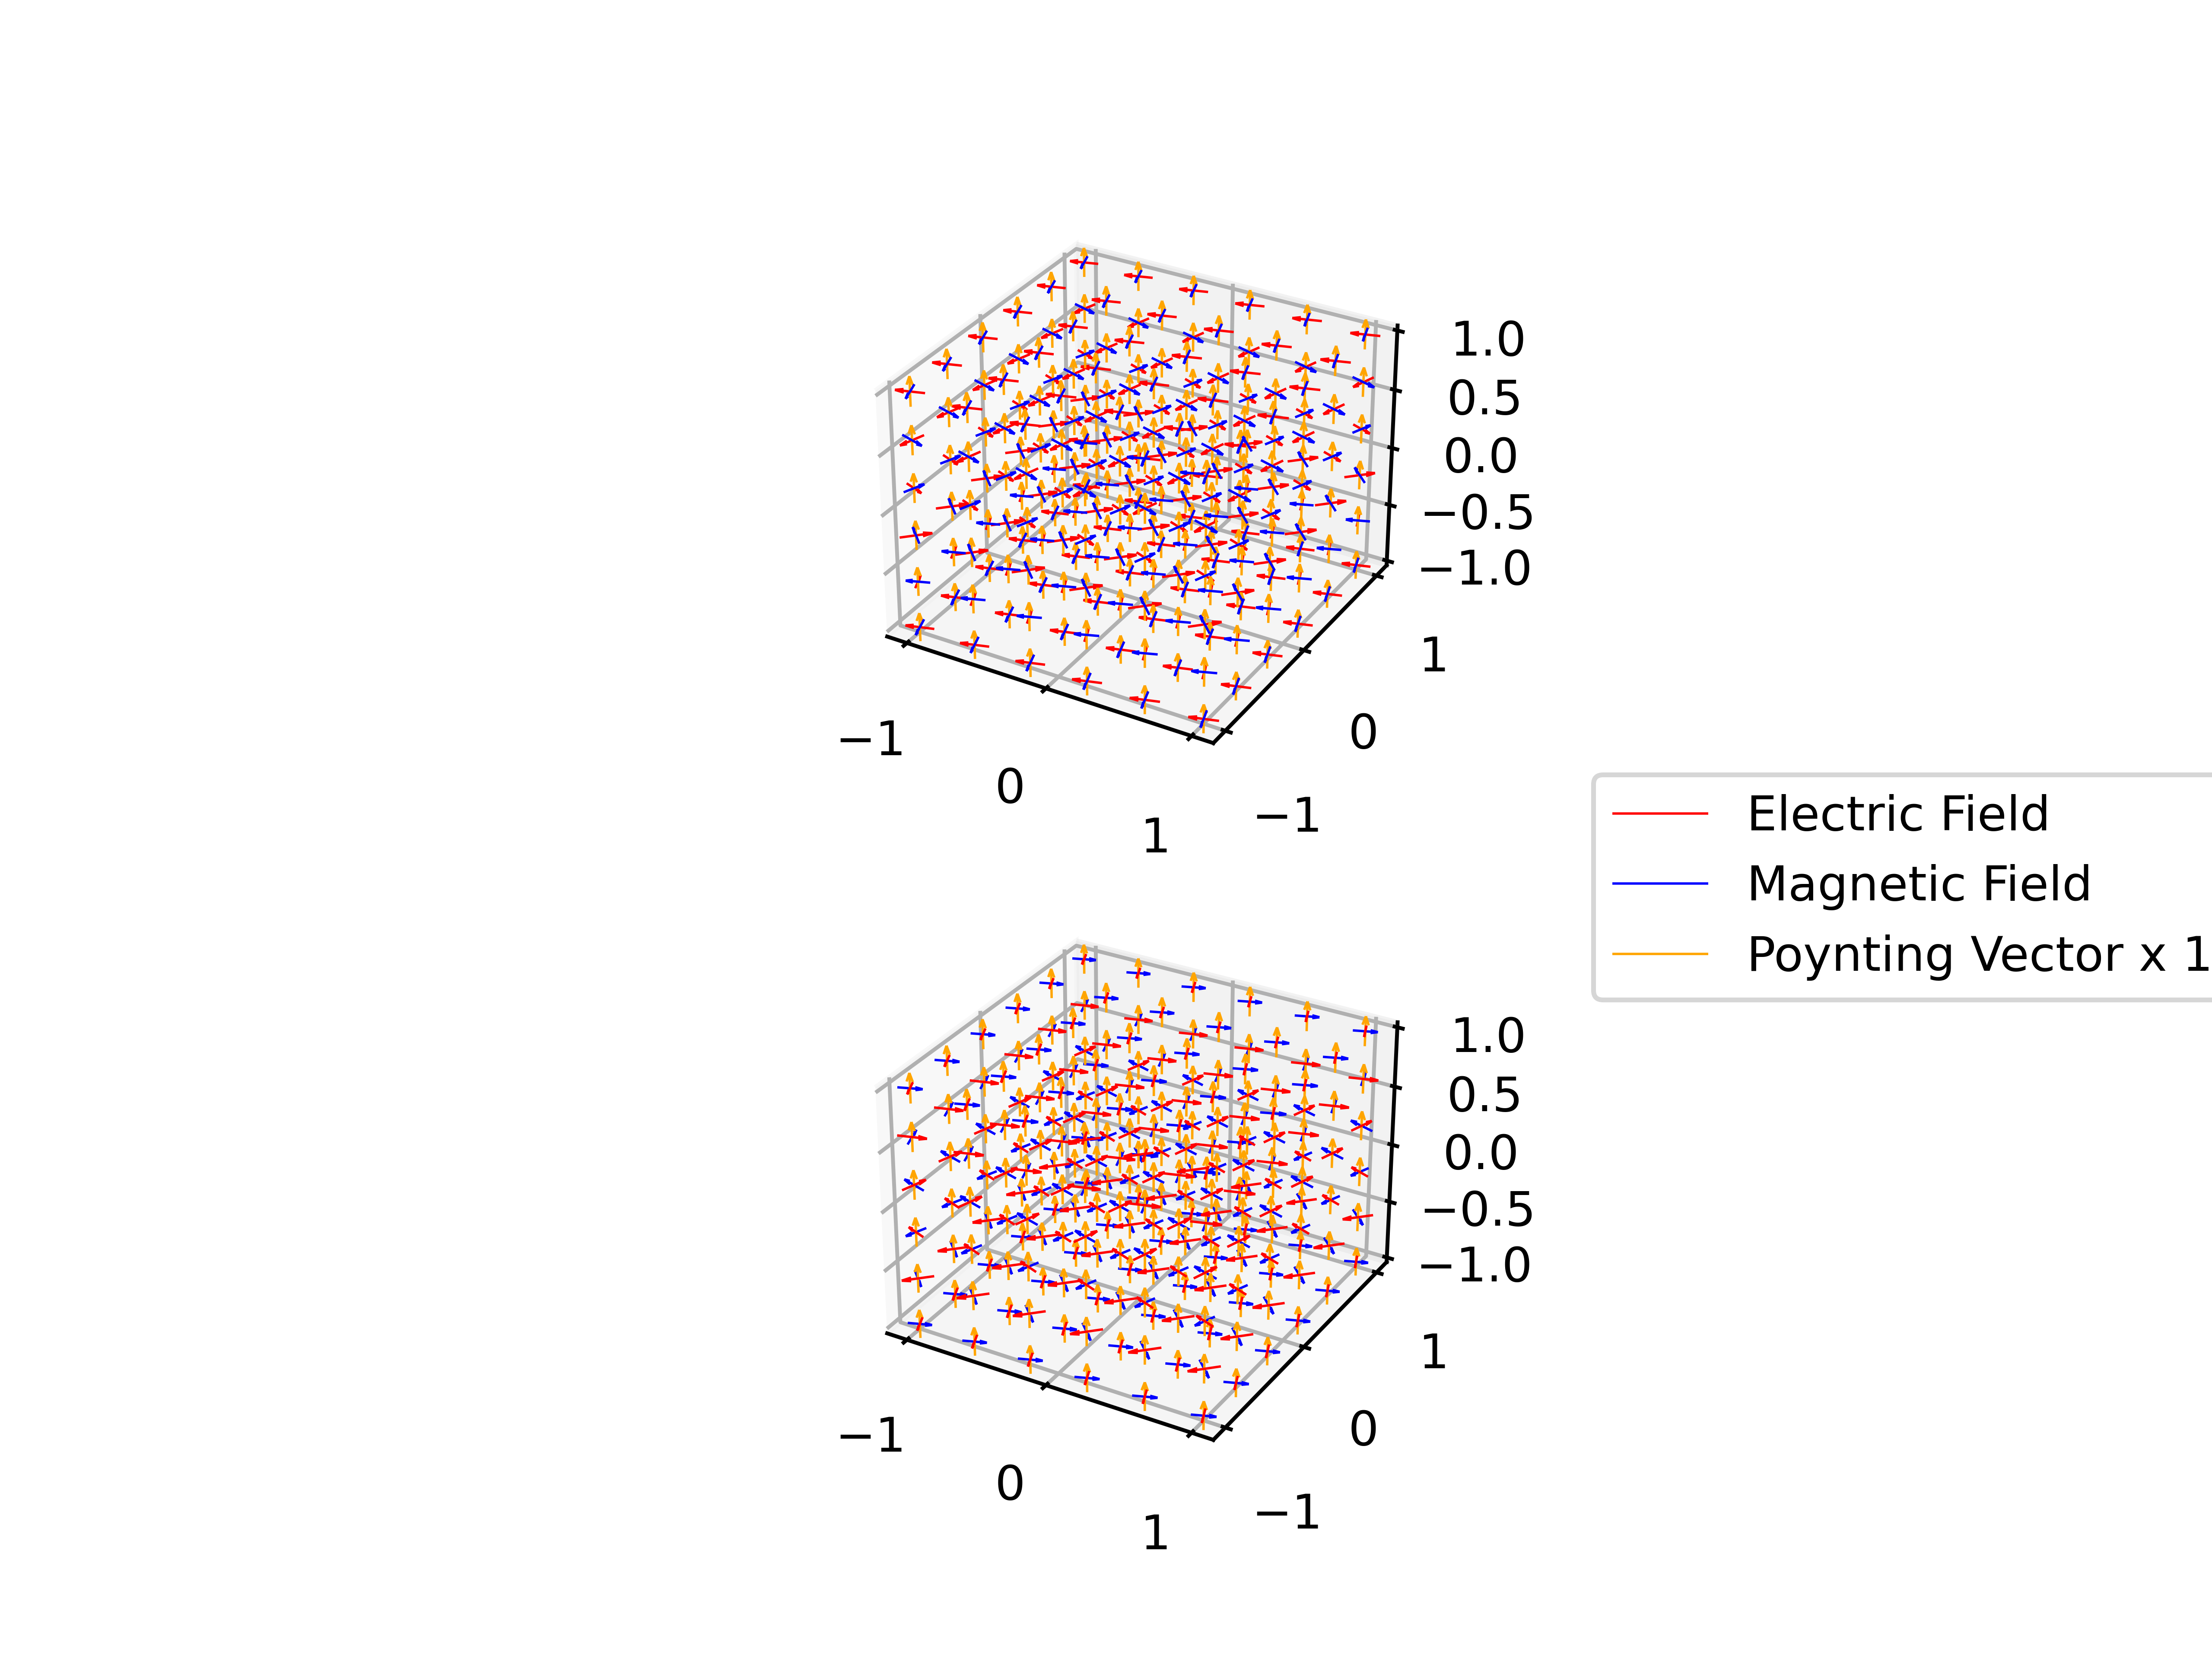

In [39]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 0.3*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.25 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.4 * np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='orange', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='orange', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

***As expected, the magnitude and direction of the Poynting vector remains constant despite changes to the magnitude and direction of the electric and magnetic field lines. Since the E and B fields can be thought of as sinusoidal waveforms, this makes sense. And since the two fields are in phase, their magnitudes grow and shrink and cross their respective x- and y-planes according to the same sine pattern. At one point in time, they may both be at relatively low magnitudes. At another, they may both be at maximum magnitude. However, their cross product - the Poynting vector - does not change in magnitude or direction regardless of the time at which we choose to plot.***

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

***Adjusting k did not lead to material changes in the plots for me. Presumably, if the magnitude of the overall wave increases, we would expect the magnitudes of the E and/or B fields and the magnitude of the Poynting vector to also increase.***

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?

***At alpha = 0, the E and B fields remain perfectly orthogonal to each other at all points in time. At alpha = pi/2, the E and B fields get much more jumbled and the middle of the plot gets quite messy. This makes sense, as the E and B fields should be perfectly out of phase if their phases differ by pi/2.***

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

***I'm not sure how to describe this well, other than saying the plot becomes less uniform and more chaotic as the difference in phases approaches pi/2. Does this change the polarization from linear to circular?***

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [31]:
# Name of file to store movie.
num_frames = 500

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.25 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.50 * np.pi

In [32]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = (kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    print("%s saved ..." % file_name.format(i))
    plt.close(fig)

000_movie.jpg saved ...
001_movie.jpg saved ...
002_movie.jpg saved ...
003_movie.jpg saved ...
004_movie.jpg saved ...
005_movie.jpg saved ...
006_movie.jpg saved ...
007_movie.jpg saved ...
008_movie.jpg saved ...
009_movie.jpg saved ...
010_movie.jpg saved ...
011_movie.jpg saved ...
012_movie.jpg saved ...
013_movie.jpg saved ...
014_movie.jpg saved ...
015_movie.jpg saved ...
016_movie.jpg saved ...
017_movie.jpg saved ...
018_movie.jpg saved ...
019_movie.jpg saved ...
020_movie.jpg saved ...
021_movie.jpg saved ...
022_movie.jpg saved ...
023_movie.jpg saved ...
024_movie.jpg saved ...
025_movie.jpg saved ...
026_movie.jpg saved ...
027_movie.jpg saved ...
028_movie.jpg saved ...
029_movie.jpg saved ...
030_movie.jpg saved ...
031_movie.jpg saved ...
032_movie.jpg saved ...
033_movie.jpg saved ...
034_movie.jpg saved ...
035_movie.jpg saved ...
036_movie.jpg saved ...
037_movie.jpg saved ...
038_movie.jpg saved ...
039_movie.jpg saved ...
040_movie.jpg saved ...
041_movie.jpg sa

342_movie.jpg saved ...
343_movie.jpg saved ...
344_movie.jpg saved ...
345_movie.jpg saved ...
346_movie.jpg saved ...
347_movie.jpg saved ...
348_movie.jpg saved ...
349_movie.jpg saved ...
350_movie.jpg saved ...
351_movie.jpg saved ...
352_movie.jpg saved ...
353_movie.jpg saved ...
354_movie.jpg saved ...
355_movie.jpg saved ...
356_movie.jpg saved ...
357_movie.jpg saved ...
358_movie.jpg saved ...
359_movie.jpg saved ...
360_movie.jpg saved ...
361_movie.jpg saved ...
362_movie.jpg saved ...
363_movie.jpg saved ...
364_movie.jpg saved ...
365_movie.jpg saved ...
366_movie.jpg saved ...
367_movie.jpg saved ...
368_movie.jpg saved ...
369_movie.jpg saved ...
370_movie.jpg saved ...
371_movie.jpg saved ...
372_movie.jpg saved ...
373_movie.jpg saved ...
374_movie.jpg saved ...
375_movie.jpg saved ...
376_movie.jpg saved ...
377_movie.jpg saved ...
378_movie.jpg saved ...
379_movie.jpg saved ...
380_movie.jpg saved ...
381_movie.jpg saved ...
382_movie.jpg saved ...
383_movie.jpg sa

In [37]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

zsh:1: command not found: ffmpeg


In [34]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")

Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

***My laptop had a ton of issues running this code. I suspect the issue might be because I'm on a Mac. I tried a few troubleshooting tips I found online with no success. However, along the way I found some excellent summaries of the topic. The E and B fields, and thus the EMF, will be linearly polarized when their phase difference is zero. This results in a wave moving along a single plane in the direction of propogation. In comparison, a circularly polarized EMF results from E and B fields that are equal in magnitude but out of phase by a factor of pi/2. Eliptical polarization arises when E and B fields are not equal in magnitude and differ in phase by something other than exactly zero or pi/2.***

- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

***See above.***

Why is it called an "electromagnetic plane wave"?

***Since an electromagnetic field manifests and propogates in three dimensions, it makes sense than an electromagnetic wave moves through space as a 2D plane rather than a 1D point in space and time. Within each slice of 2D plane taken at each point in time, the values of the E and B fields are constant.***

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

***I'd love to run this code again with interactive plots if possible! It was challenging to see the patterns in the field lines in the 3D gridspace from a static perspective. I'm sure my colorblindness played a small role in that too. However, by the end of the notebook I was still steered in the right direction to figure out how to build waves that are polarized differently.***